# Assignment

Student: José Maria Trindade

Master: Master in Big Data and AI solutions

### Radiance Group Consulting


Radiance Group is a venture capital investing in early stage startups across the globe and has hired you as an analyst to perform data driven analysis to empower its investments through cutting edge insights.

 

Crunchbase is a company providing business information about private and public companies. Their content includes investment and funding information, founding members and individuals in leadership positions, mergers and acquisitions, news, and industry trends.

 

Today, we are going to work on this interesting statistical consulting assignment that corresponds to data from Crunchbase and attempts to answer questions for Radiance Group. The dataset can be accessed from the link: https://raw.githubusercontent.com/notpeter/crunchbase-data/master/companies.csv

In [618]:
#Import section

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statistics

### 1. Data preparation:
Download the data file and read it in a Jupyter-notebook using pandas.  Perform any operations that you consider necessary to go forward analysing this dataset but do not forget to report your observations in writing for every such operations.

In [619]:
# Let's upload the csv file "companies" from a url to a pandas df
df = pd.read_csv("https://raw.githubusercontent.com/notpeter/crunchbase-data/master/companies.csv",\
                 na_values = ["-"],\
                 parse_dates = [11,12,13],\
                 date_format = "%Y-%m-%d",\
                )

In [620]:
# Let's check the first few rows of the df
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [621]:
# !!! To be decided - talk to Daniel
#df[df.duplicated(subset=["name","homepage_url","region"],keep=False)].sort_values("name")

In [622]:
# Let's check the last few rows of the df
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851.0,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [623]:
# How many records
print("There are:",df.shape[0], "records")

# How many features
print("There are:",df.shape[1], "features")


There are: 66368 records
There are: 14 features


In [624]:
# Are there duplicates?
duplicates = df.duplicated().sum()
print(f"There are {duplicates} number of exact duplicates in our dataset.")

There are 0 number of exact duplicates in our dataset.


In [625]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [626]:
# Let's investigate the features that the df contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          66368 non-null  object        
 1   name               66367 non-null  object        
 2   homepage_url       61310 non-null  object        
 3   category_list      63220 non-null  object        
 4   funding_total_usd  53583 non-null  float64       
 5   status             66368 non-null  object        
 6   country_code       59410 non-null  object        
 7   state_code         57821 non-null  object        
 8   region             58338 non-null  object        
 9   city               58340 non-null  object        
 10  funding_rounds     66368 non-null  int64         
 11  founded_at         51147 non-null  object        
 12  first_funding_at   66344 non-null  object        
 13  last_funding_at    66368 non-null  datetime64[ns]
dtypes: dat

#### **Observations and Next steps:**

- There is 1 record with "name" missing.
- From the information above, it seems that all of the companies extracted from CrunchBase were funded at least once

- There are variables **still not** in the correct data type:

    - "status" should be a category

    - "founded_at" should be a datetime variable

    - "first_funding_at" should be a datetime variable

In [627]:
# Correcting a NaN value
df.at[56916,"name"] = "tell it in"

In [628]:
# Correcting the type of status to category type
df["status"] = df["status"].astype("category")

In [629]:
# Correcting the type of founded_at and first_funding_at to datetime type
df["founded_at"] = pd.to_datetime(df['founded_at'], errors='coerce')
df["first_funding_at"] = pd.to_datetime(df['first_funding_at'], errors='coerce')

In [630]:
# Assigning today date to a variable
today_date = pd.to_datetime(dt.date.today())

# Funding date should logically precede the first funding date. We will adjust the founding dates to the first funding date
df.loc[df["founded_at"]>df["first_funding_at"],"founded_at"]= df["first_funding_at"]

# No date should be later than today's date
df.loc[df["last_funding_at"]>today_date,"last_funding_at"] = today_date

### 2. Measuring Central Tendency and Spread:
Identify the variables associated with total funding raised by a startup and the number of funding rounds in the aforesaid dataset and analyse them using various methods of central tendency and measures of spread. Describe your results and explain the type of variables observed.

In [631]:
def print_measuring_results(name_variable,df_column):
    
    print(f"\n------------- {name_variable} -------------\n")
    
    print("\033[1mMeasures of Central Tendency\033[0m")
    print(f"Mean: {df_column.mean():,.2f}")
    print(f"Median: {df_column.median():,.2f}")
    print(f"Mode: {df_column.mode().values[0]:,.2f}")
    
    print("\n\033[1mMeasures of Spread\033[0m")
    print(f"Range: {df_column.max()-df_column.min():,.2f}")
    print(f"Interquartile Range: {df_column.quantile(0.75)-df_column.quantile(0.25):,.2f}")
    print(f"Variance: {df_column.var():,.2f}")
    print(f"Standard Deviation: {df_column.std():,.2f}")
    
    print("\n\033[1mMeasures of Location\033[0m")
    print(f"1st Quartile: {df_column.quantile(0.25):,.2f}")
    print(f"3rd Quartile: {df_column.quantile(0.75):,.2f}")
    print(f"Min: {df_column.min():,.2f}")
    print(f"Max: {df_column.max():,.2f}")
    

**!!! maybe in the future we could explore distribution and cummulative distribution for the histogram**

In [632]:
def visualize_histogram(title,xlabel,df_column):
    

    # Creating the Histogram chart for visualization
    fig, ax = plt.subplots(figsize=(8, 6))
        
    ax.hist(df_column, bins=30, edgecolor='black',alpha=0.2)
    
    hist, bin_edges = np.histogram(df_column.dropna(), bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax.plot(bin_centers, hist, color='lightsteelblue', linewidth=2)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    
    
    # Disable scientific notation on the x-axis
    #ax.ticklabel_format(axis='x', style='plain')
    #ax.set_xticks(bin_edges)
    #ax.set_xticklabels(bin_edges, rotation=90)
    
    # Show the plot
    plt.show()   

In [633]:
def visualize_boxplot(title,xlabel,df_column,xscale='linear'):

    # Creating a boxplot for visualization

    fig, ax = plt.subplots(figsize=(8, 6))

    # dropping NaN values for the chart
    series = df_column.dropna()
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    
    # Create a boxplot on the specified axis
    ax.boxplot(series, vert=False)

    # Logaritmic scale because the values are too dispersed
    ax.set_xscale(xscale)

    plt.show()

- The first variable we are going to study is **"funding_total_usd"**, which is a float type variable in our dataset and a continuous numerical data as it can take any number in a infinite set of values 0 to +∞ .

In [634]:
print_measuring_results("Total Funding raised $",df["funding_total_usd"])


------------- Total Funding raised $ -------------

Measures of Central Tendency
Mean: 18,478,604.04
Median: 2,000,000.00
Mode: 1,000,000.00

Measures of Spread
Range: 30,079,502,999.00
Interquartile Range: 9,664,376.50
Variance: 35,348,990,750,181,076.00
Standard Deviation: 188,013,272.80

Measures of Location
1st Quartile: 335,623.50
3rd Quartile: 10,000,000.00
Min: 1.00
Max: 30,079,503,000.00


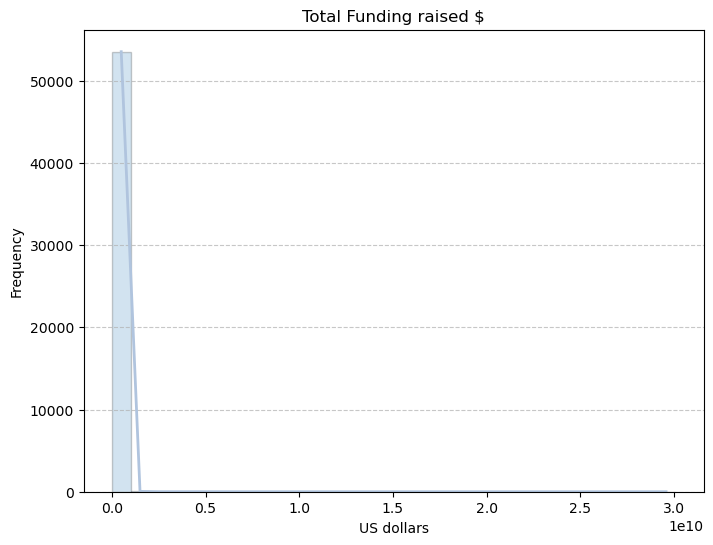

In [635]:
visualize_histogram("Total Funding raised $","US dollars",df["funding_total_usd"])

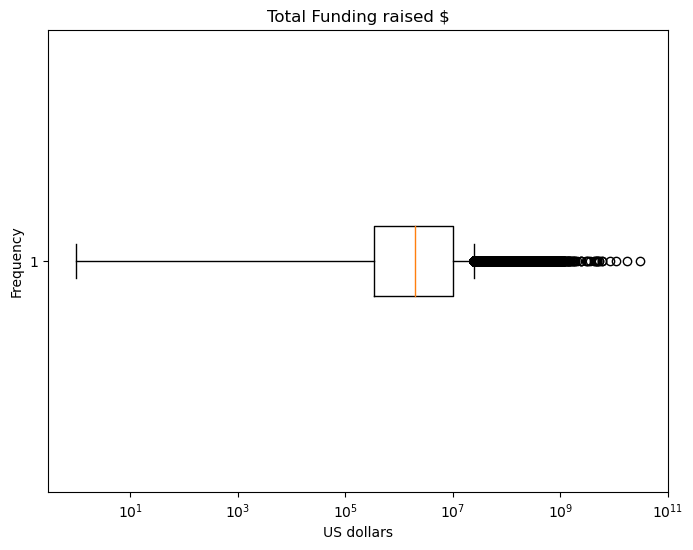

In [636]:
visualize_boxplot("Total Funding raised $","US dollars",df["funding_total_usd"],xscale="log")

- The second variable we are going to study is **"funding_rounds"**, which is an integer type variable in our dataset and a numerical continuous data as it can't take decimal values but it can take any positive value.

In [637]:
print_measuring_results("Number of Funding rounds",df["funding_rounds"])


------------- Number of Funding rounds -------------

Measures of Central Tendency
Mean: 1.73
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 18.00
Interquartile Range: 1.00
Variance: 1.85
Standard Deviation: 1.36

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 19.00


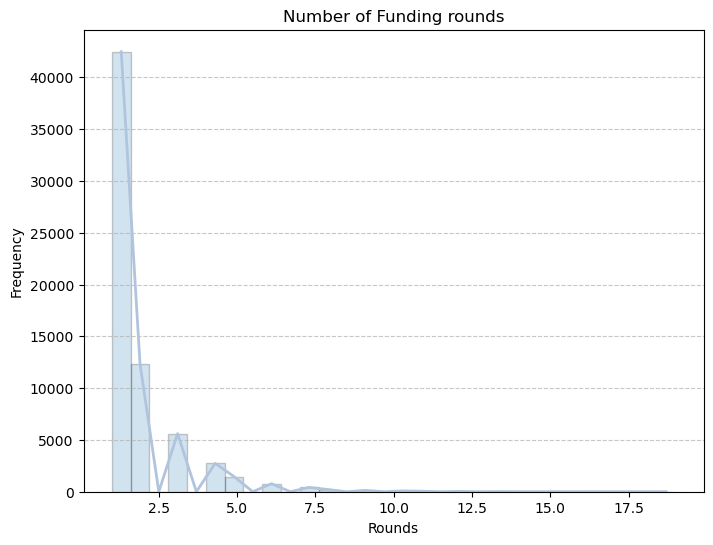

In [638]:
visualize_histogram("Number of Funding rounds","Rounds",df["funding_rounds"])

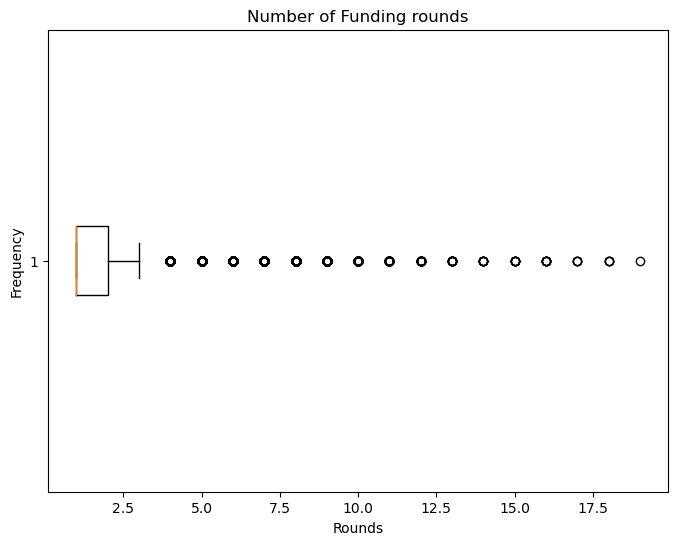

In [639]:
visualize_boxplot("Number of Funding rounds","Rounds",df["funding_rounds"])

**Observations to question number 2**

**Total Funding USD**

Skewness:

- The mean (18,478,604.04) is greater than the median (2,000,000.00), indicating a right-skewed distribution.
This suggests that there are a few high-value funding amounts that are pulling the mean to the right.

Mode and Distribution Shape:
- The mode of 1,000,000.00 suggests a peak in the distribution around this value.
The distribution may have multiple peaks or be skewed based on the presence of the mode.

Range and Spread:
- The large range of 30,079,502,999.00 indicates substantial variability in funding amounts.
There are significant differences between the smallest and largest funding values in the dataset.

Interquartile Range (IQR):
- The IQR of 9,664,376.50 provides a measure of the spread of the central 50% of the data.
It suggests that the middle half of the funding amounts is relatively concentrated within this range.

Variance and Standard Deviation:
- The high variance and standard deviation indicate a considerable degree of dispersion in the dataset.
Funding amounts vary widely from the mean, contributing to the high variance.

Quartiles:
- The 1st quartile (335,623.50) and the 3rd quartile (10,000,000.00) provide insights into the lower and upper halves of the dataset.
A significant portion of the data lies between these quartiles.

Minimum and Maximum Values:
- The minimum value of 1.00 suggests the presence of an outlier or a very low funding amount.
The maximum value of 30,079,503,000.00 represents the upper extreme of funding in the dataset.

Distribution Symmetry:
- The skewness towards higher values and the presence of a mode suggest a positively skewed distribution.
This asymmetry implies that there are more lower funding amounts and a few higher ones.

Data Spread and Potential Outliers:
- The wide spread, high range, and large standard deviation indicate potential outliers or extreme values.
Investigating outliers is important to understand if they are valid data points.


**Number of Funding rounds**

Skewness:
- The mean (1.73) is greater than the median (1.00), indicating a right-skewed distribution.
This suggests that there are a few funding rounds with a higher number of rounds that are pulling the mean to the right.

Mode and Distribution Shape:
- The mode of 1.00 suggests a peak in the distribution around this value.
The distribution may have multiple peaks or be skewed based on the presence of the mode.

Range and Spread:
- The range of 18.00 indicates variability in the number of funding rounds.
There are significant differences between the smallest and largest numbers of funding rounds in the dataset.

Interquartile Range (IQR):
- The IQR of 1.00 provides a measure of the spread of the central 50% of the data.
It suggests that the middle half of the number of funding rounds is relatively concentrated within this range.

Variance and Standard Deviation:
- The variance of 1.85 and standard deviation of 1.36 indicate a moderate degree of dispersion in the dataset.
The number of funding rounds varies moderately from the mean, contributing to the variance.

Quartiles:
- The 1st quartile (1.00) and the 3rd quartile (2.00) provide insights into the lower and upper halves of the dataset.
A significant portion of the data lies between these quartiles.

Minimum and Maximum Values:
- The minimum value of 1.00 suggests that there are companies with only one funding round.
The maximum value of 19.00 represents the upper extreme of the number of funding rounds in the dataset.

Distribution Symmetry:
- The skewness towards higher values and the presence of a mode suggest a positively skewed distribution.
This asymmetry implies that there are more companies with a lower number of funding rounds and a few with a higher number.

Data Spread and Potential Outliers:
- The moderate spread, moderate range, and standard deviation indicate variability in the number of funding rounds.
Investigating companies with a higher number of funding rounds is important to understand if they are valid data points


### 3. Outlier analysis:
Examine the aforesaid two variables in Question 2 for possible outliers. You have to identify the cutoff values of those outliers on both ends. Then perform the following operations to understand your extreme observations-

**A**. Drop the outliers from the dataset and repeat the procedure in Question 2 to draw conclusions. Report your observations extensively and in as much detail as possible.

**B**. Impute the outliers in the dataset with the value of mean and repeat the procedure in Question 2 to draw conclusions. Report in writing your observations extensively and in as much detail as possible.

**C**. Replace the outliers in the dataset with the maximum value or minimum value possible by applying capping method.

It means that you have to find the maximum and minimum values for your variables by doing the following-

Maximum value = Mean + 3 units of Standard Deviation

Minimum value  = Mean - 3 units of Standard Deviation

Once you have found these maximum and minimum values, you will have to replace all the values in your variables greater than maximum value by the maximum value and same for minimum value. Thereafter repeat the procedure in Question 2 and draw conclusions. Again, write your observations extensively and in as much detail as possible.

Hint: You can identify the outliers using the Inter-Quartile Range (IQR) method and explain which of the method you prefer (also doing a comparative analysis of various values found while applying the three methods) and why to treat outliers. Create appropriate plots (if necessary) to explain the results of the different methods.

- **"funding_total_usd"**

In [640]:
Q1 = df["funding_total_usd"].quantile(0.25)
Q3 = df["funding_total_usd"].quantile(0.75)
IQR = Q3 - Q1
lower_outliers_cutoff = Q1 - 1.5*IQR
upper_outliers_cutoff = Q3 + 1.5*IQR
mean_value = df["funding_total_usd"].mean()
max_value = df["funding_total_usd"].mean() + 3*df["funding_total_usd"].std()
min_value = df["funding_total_usd"].mean() - 3*df["funding_total_usd"].std()

In [641]:
df_a_1 = df.loc[(df["funding_total_usd"]>lower_outliers_cutoff)\
                        & (df["funding_total_usd"]<upper_outliers_cutoff)]

df_b_1 = df.copy()
df_b_1.loc[(df_b_1["funding_total_usd"]<lower_outliers_cutoff)\
        | (df_b_1["funding_total_usd"]>upper_outliers_cutoff),"funding_total_usd"] = mean_value

df_c_1 = df.copy()
df_c_1.loc[df_c_1["funding_total_usd"]>max_value,"funding_total_usd"] = max_value
df_c_1.loc[df_c_1["funding_total_usd"]<min_value,"funding_total_usd"] = min_value

In [642]:
print_measuring_results("Original dataset",df["funding_total_usd"])
print_measuring_results("Dataset without outliers",df_a_1["funding_total_usd"])
print_measuring_results("Dataset with outliers = mean",df_b_1["funding_total_usd"])
print_measuring_results("Dataset with cap method",df_c_1["funding_total_usd"])


------------- Original dataset -------------

Measures of Central Tendency
Mean: 18,478,604.04
Median: 2,000,000.00
Mode: 1,000,000.00

Measures of Spread
Range: 30,079,502,999.00
Interquartile Range: 9,664,376.50
Variance: 35,348,990,750,181,076.00
Standard Deviation: 188,013,272.80

Measures of Location
1st Quartile: 335,623.50
3rd Quartile: 10,000,000.00
Min: 1.00
Max: 30,079,503,000.00

------------- Dataset without outliers -------------

Measures of Central Tendency
Mean: 3,825,879.59
Median: 1,290,000.00
Mode: 1,000,000.00

Measures of Spread
Range: 24,479,999.00
Interquartile Range: 4,750,000.00
Variance: 29,368,746,256,990.24
Standard Deviation: 5,419,293.89

Measures of Location
1st Quartile: 250,000.00
3rd Quartile: 5,000,000.00
Min: 1.00
Max: 24,480,000.00

------------- Dataset with outliers = mean -------------

Measures of Central Tendency
Mean: 5,845,096.83
Median: 2,000,000.00
Mode: 18,478,604.04

Measures of Spread
Range: 24,479,999.00
Interquartile Range: 9,664,376.

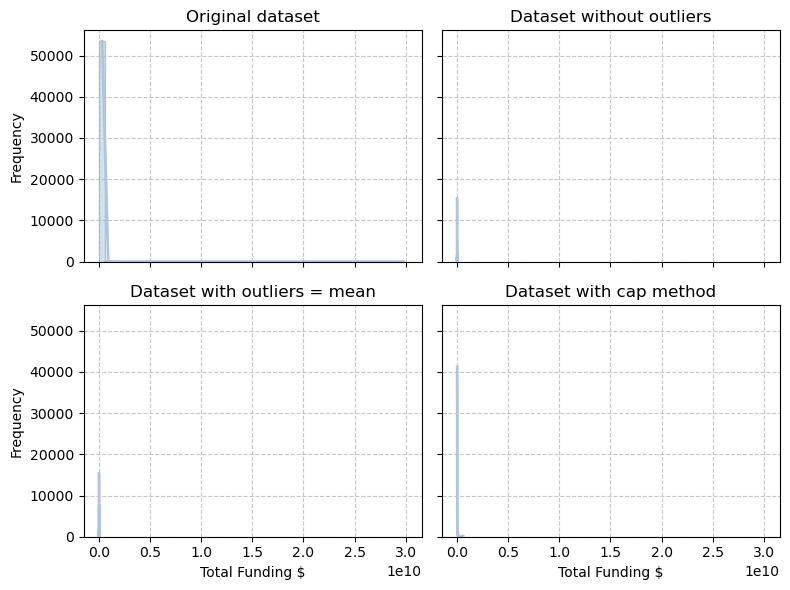

In [643]:
# Creating the Histogram chart for visualization

fig, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(8, 6))

ax[0,0].hist(df["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Original dataset")
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(df_a_1["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_a_1["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].set_title("Dataset without outliers")

ax[1,0].hist(df_b_1["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_b_1["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Dataset with outliers = mean")
ax[1,0].set_xlabel("Total Funding $")
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(df_c_1["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_1["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Dataset with cap method")
ax[1,1].set_xlabel("Total Funding $")


plt.tight_layout()

# Show the plot
plt.show()   

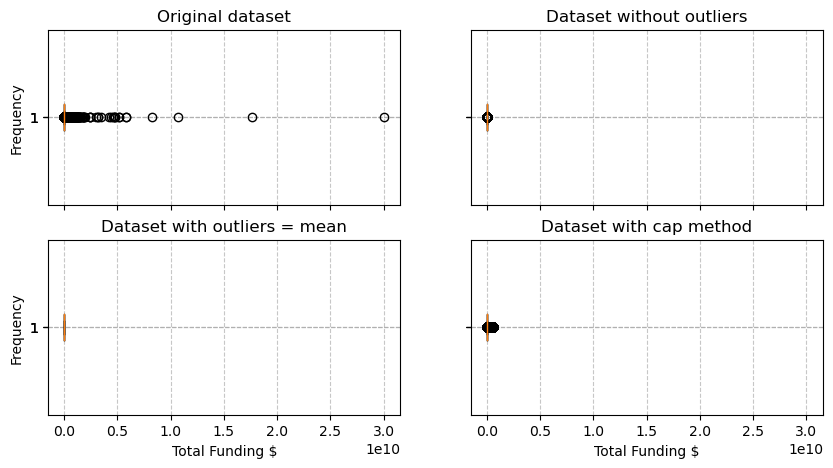

In [644]:
fig, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 5))

ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Original dataset")
ax[0,0].set_ylabel('Frequency')
ax[0,0].boxplot(df["funding_total_usd"].dropna(), vert=False)

ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].boxplot(df_a_1["funding_total_usd"].dropna(), vert=False)
ax[0,1].set_title("Dataset without outliers")

ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Dataset with outliers = mean")
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel("Total Funding $")
ax[1,0].boxplot(df_b_1["funding_total_usd"].dropna(), vert=False)


ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Dataset with cap method")
ax[1,1].set_xlabel("Total Funding $")
ax[1,1].boxplot(df_c_1["funding_total_usd"].dropna(), vert=False)


plt.show()

 - **"funding_rounds"**

In [645]:
Q1 = df["funding_rounds"].quantile(0.25)
Q3 = df["funding_rounds"].quantile(0.75)
IQR = Q3 - Q1
lower_outliers_cutoff = Q1 - 1.5*IQR
upper_outliers_cutoff = Q3 + 1.5*IQR
mean_value = df["funding_rounds"].mean()
max_value = df["funding_rounds"].mean() + 3*df["funding_rounds"].std()
min_value = df["funding_rounds"].mean() - 3*df["funding_rounds"].std()

In [646]:
df_a_2 = df.loc[(df["funding_rounds"]>lower_outliers_cutoff)\
                        & (df["funding_rounds"]<upper_outliers_cutoff)]

df_b_2 = df.copy()
df_b_2.loc[(df_b_2["funding_rounds"]<lower_outliers_cutoff)\
        | (df_b_2["funding_rounds"]>upper_outliers_cutoff),"funding_rounds"] = mean_value

df_c_2 = df.copy()
df_c_2.loc[df_c_2["funding_rounds"]>max_value,"funding_rounds"] = max_value
df_c_2.loc[df_c_2["funding_rounds"]<min_value,"funding_rounds"] = min_value

In [647]:
print_measuring_results("Original dataset",df["funding_rounds"])
print_measuring_results("Dataset without outliers",df_a_2["funding_rounds"])
print_measuring_results("Dataset with outliers = mean",df_b_2["funding_rounds"])
print_measuring_results("Dataset with cap method",df_c_2["funding_rounds"])


------------- Original dataset -------------

Measures of Central Tendency
Mean: 1.73
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 18.00
Interquartile Range: 1.00
Variance: 1.85
Standard Deviation: 1.36

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 19.00

------------- Dataset without outliers -------------

Measures of Central Tendency
Mean: 1.39
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 2.00
Interquartile Range: 1.00
Variance: 0.42
Standard Deviation: 0.65

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 3.00

------------- Dataset with outliers = mean -------------

Measures of Central Tendency
Mean: 1.42
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 2.00
Interquartile Range: 1.00
Variance: 0.40
Standard Deviation: 0.63

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 3.00

------------- Dataset with cap method -------------

Measures of Central Tendency
Mean: 1.69
Median: 1.00
Mode

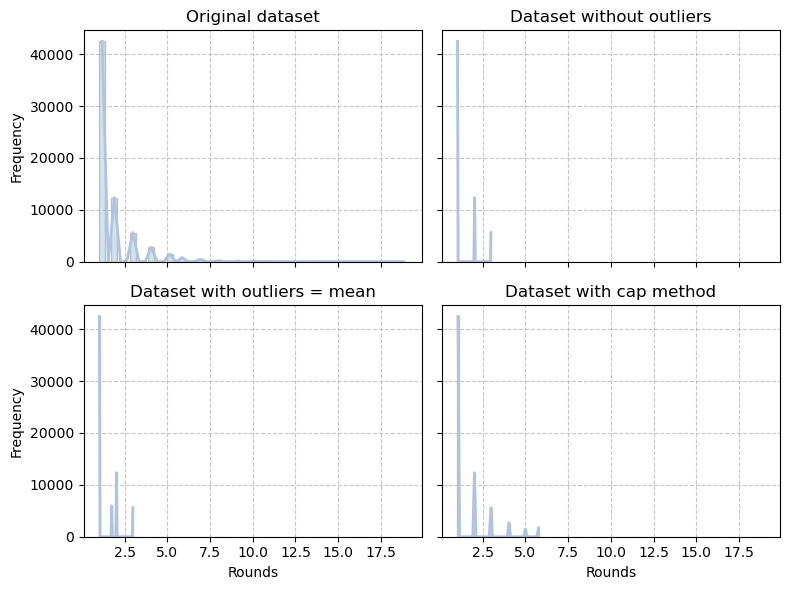

In [648]:
# Creating the Histogram chart for visualization

fig, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(8, 6))

ax[0,0].hist(df["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Original dataset")
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(df_a_2["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_a_2["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].set_title("Dataset without outliers")

ax[1,0].hist(df_b_2["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_b_2["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Dataset with outliers = mean")
ax[1,0].set_xlabel("Rounds")
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(df_c_2["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_2["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Dataset with cap method")
ax[1,1].set_xlabel("Rounds")


plt.tight_layout()

# Show the plot
plt.show()   

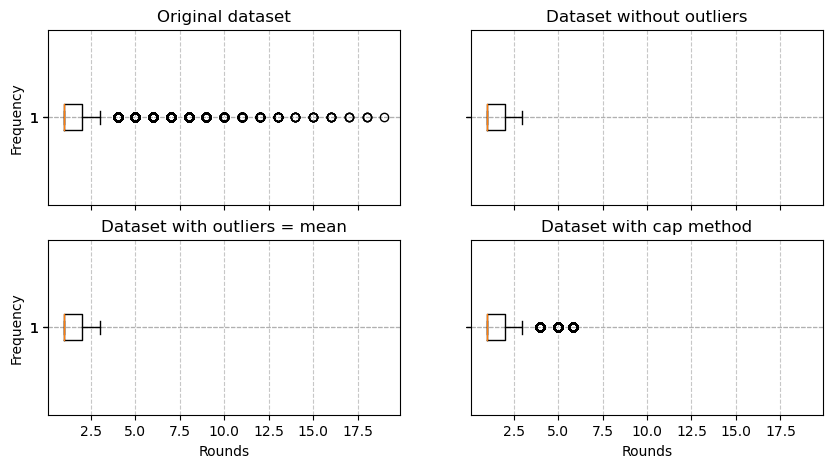

In [649]:
fig, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 5))

ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Original dataset")
ax[0,0].set_ylabel('Frequency')
ax[0,0].boxplot(df["funding_rounds"].dropna(), vert=False)

ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].boxplot(df_a_2["funding_rounds"].dropna(), vert=False)
ax[0,1].set_title("Dataset without outliers")

ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Dataset with outliers = mean")
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel("Rounds")
ax[1,0].boxplot(df_b_2["funding_rounds"].dropna(), vert=False)


ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Dataset with cap method")
ax[1,1].set_xlabel("Rounds")
ax[1,1].boxplot(df_c_2["funding_rounds"].dropna(), vert=False)


plt.show()

**Observations to question 3**

**Total Funding**

Original Dataset:

- Skewness:
Right-skewed distribution.
Mean is greater than median.
Presence of a mode at 1,000,000.00.

- Range and Spread:
Large range (30,079,502,999.00) indicates substantial variability.
High variance and standard deviation, suggesting wide dispersion.

- Interquartile Range (IQR):
IQR (9,664,376.50) shows central 50% concentration.

Dataset without Outliers:

- Skewness:
Right-skewed distribution persists but reduced.
Mean is still greater than median.

- Range and Spread:
Reduced range (24,479,999.00) after removing outliers.
Lower variance and standard deviation.

- Interquartile Range (IQR):
IQR (4,750,000.00) remains concentrated.

Dataset with Mean for Outliers:

- Skewness:
Right-skewed distribution.
Mean is greater than median.
Presence of a mode at 18,478,604.04.

- Range and Spread:
Similar range (24,479,999.00) to the original dataset.
Higher variance and standard deviation than without outliers.

- Interquartile Range (IQR):
IQR (9,664,376.50) shows central 50% concentration.

Dataset with Cap Method for Outliers:

- Skewness:
Right-skewed distribution.
Mean is greater than median.

- Range and Spread:
Larger range (582,518,421.45) due to capping method.
Higher variance and standard deviation.

- Interquartile Range (IQR):
IQR (9,664,376.50) shows central 50% concentration.

Summary:

- Impact of Outliers:
Removing outliers reduces skewness and spread.
Capping method maintains the original distribution shape but increases range.

- Central Tendency:
Mean consistently greater than median, indicating right skewness.

- Spread and Concentration:
Original and capped datasets have higher variability.
IQR consistently shows concentration in the middle 50% of the data.

- Distribution Shape:
Right-skewed distribution in all cases.
Presence of a mode in original and dataset with mean for outliers.


**Number of Funding Rounds**


Summary:

- Impact of Outliers:
Removing outliers reduces mean and spread.
Capping method maintains central tendency but increases range.

- Central Tendency:
Mean consistently greater than median, indicating right skewness.

- Spread and Concentration:
Original and capped datasets have higher variability.
IQR consistently shows concentration in the middle 50% of the data.

- Distribution Shape:
Right-skewed distribution in all cases.
Presence of a mode in all datasets.

### 4. Sampling Techniques:
Choose any of the aforesaid outlier treatment method in the Question 3 and draw a random sample of a desired size, say, 1000. Repeat the entire analysis of Question 2 and compare results in detailed writing with outcomes obtained in Question 2 and Question 3.

**Observation:**
- I'm going to choose the **cap method** dataset because I believe is the one that can reduce the impact of outliers in our indicators but still keep most of its initial integrety


- **"funding_total_usd"**

In [650]:
# Drawing a sample of 1000 records
np.random.seed(10)
df_c_1_sample = df_c_1.sample(1000)

In [651]:
print_measuring_results("Dataset with cap method",df_c_1["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method",df_c_1_sample["funding_total_usd"])


------------- Dataset with cap method -------------

Measures of Central Tendency
Mean: 15,355,257.36
Median: 2,000,000.00
Mode: 1,000,000.00

Measures of Spread
Range: 582,518,421.45
Interquartile Range: 9,664,376.50
Variance: 2,341,846,784,740,977.00
Standard Deviation: 48,392,631.51

Measures of Location
1st Quartile: 335,623.50
3rd Quartile: 10,000,000.00
Min: 1.00
Max: 582,518,422.45

------------- Sample of Dataset with cap method -------------

Measures of Central Tendency
Mean: 14,923,735.09
Median: 1,788,125.00
Mode: 1,000,000.00

Measures of Spread
Range: 582,517,722.45
Interquartile Range: 9,050,000.00
Variance: 1,979,104,156,606,251.75
Standard Deviation: 44,487,123.49

Measures of Location
1st Quartile: 300,000.00
3rd Quartile: 9,350,000.00
Min: 700.00
Max: 582,518,422.45


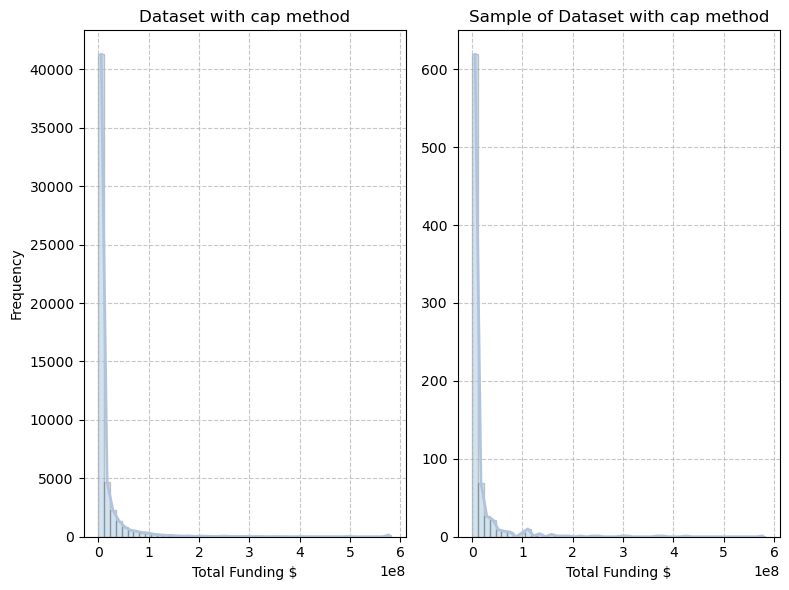

In [652]:
# Creating the Histogram chart for visualization

fig, ax = plt.subplots(1,2,sharex=True,figsize=(8, 6))

ax[0].hist(df_c_1["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_1["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0].set_title("Dataset with cap method")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Total Funding $')


ax[1].hist(df_c_1_sample["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_1_sample["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1].set_title("Sample of Dataset with cap method")
ax[1].set_xlabel('Total Funding $')


plt.tight_layout()

# Show the plot
plt.show() 


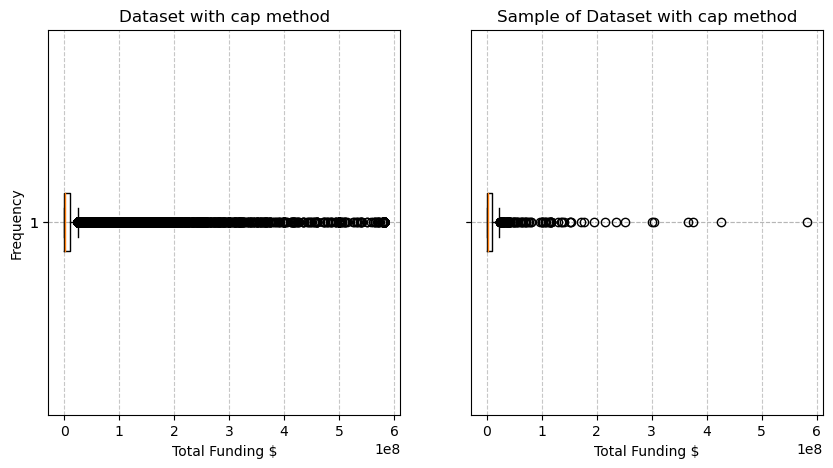

In [653]:
# Creating the BoxPlot chart for visualization

fig, ax = plt.subplots(1,2,sharex=True, sharey=True,figsize=(10, 5))


ax[0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0].set_title("Dataset with cap method")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel("Total Funding $")
ax[0].boxplot(df_c_1["funding_total_usd"].dropna(), vert=False)


ax[1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1].set_title("Sample of Dataset with cap method")
ax[1].set_xlabel("Total Funding $")
ax[1].boxplot(df_c_1_sample["funding_total_usd"].dropna(), vert=False)

plt.show()

 - **"funding_rounds"**

In [654]:
# Drawing a sample of 1000 records
np.random.seed(11)
df_c_2_sample = df_c_2.sample(1000)

In [655]:
print_measuring_results("Dataset with cap method",df_c_2["funding_rounds"])
print_measuring_results("Sample of Dataset with cap method",df_c_2_sample["funding_rounds"])


------------- Dataset with cap method -------------

Measures of Central Tendency
Mean: 1.69
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 4.81
Interquartile Range: 1.00
Variance: 1.37
Standard Deviation: 1.17

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 5.81

------------- Sample of Dataset with cap method -------------

Measures of Central Tendency
Mean: 1.66
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 4.81
Interquartile Range: 1.00
Variance: 1.30
Standard Deviation: 1.14

Measures of Location
1st Quartile: 1.00
3rd Quartile: 2.00
Min: 1.00
Max: 5.81


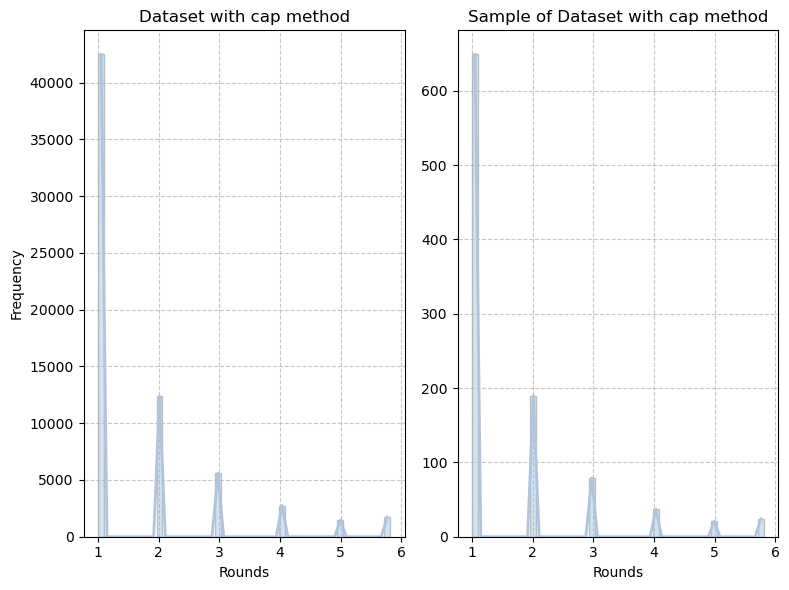

In [656]:
# Creating the Histogram chart for visualization
fig, ax = plt.subplots(1,2,figsize=(8, 6))

ax[0].hist(df_c_2["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_2["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0].set_title("Dataset with cap method")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rounds')


ax[1].hist(df_c_2_sample["funding_rounds"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_c_2_sample["funding_rounds"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1].set_title("Sample of Dataset with cap method")
ax[1].set_xlabel('Rounds')

plt.tight_layout()

# Show the plot
plt.show() 

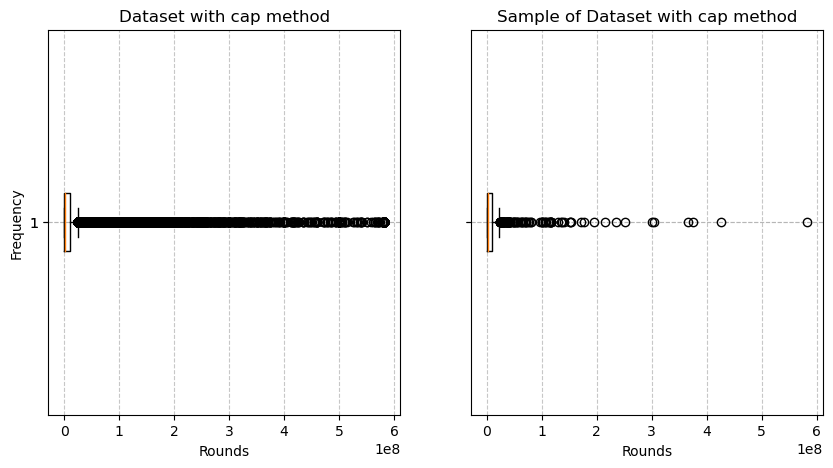

In [657]:
# Creating the BoxPlot chart for visualization

fig, ax = plt.subplots(1,2,sharex=True, sharey=True,figsize=(10, 5))


ax[0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0].set_title("Dataset with cap method")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel("Rounds")
ax[0].boxplot(df_c_1["funding_total_usd"].dropna(), vert=False)


ax[1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1].set_title("Sample of Dataset with cap method")
ax[1].set_xlabel("Rounds")
ax[1].boxplot(df_c_1_sample["funding_total_usd"].dropna(), vert=False)


plt.show()

**Observations to question 4**

**Total Funding**

Measures of Central Tendency
Differences:

- The mean of the sample is lower than the original dataset, indicating a different distribution in the sample.
- The median and mode also show differences in central tendency between the full dataset and the sample.

Measures of Spread
Differences:

- The range in the sample is much smaller than in the full dataset, indicating less variability in the sample.
- The interquartile range, variance, and standard deviation also show differences, suggesting that the sample has a narrower spread.

Measures of Location
Differences:

- The quartiles show slight differences, suggesting variations in the distribution.
- The minimum and maximum values also differ, indicating potential outliers or extreme values in the sample.

Summary:
- The sample of the dataset with the cap method exhibits differences in central tendency, spread, and location compared to the full dataset.
- These differences could be attributed to the random nature of sampling, leading to variations in statistical measures.
- Care should be taken when making inferences about the entire dataset based on a sample, and further analysis may be required to understand the reasons behind these differences.

**Number of Funding Rounds**


Measures of Central Tendency
Differences:
- The central tendencies (mean, median, mode) are very close between the full dataset and the sample, indicating consistency in these measures.

Measures of Spread
Differences:
- The spread measures (range, interquartile range, variance, standard deviation) are very similar between the full dataset and the sample, indicating consistent variability.


Measures of Location
Differences:
- The quartiles and minimum/maximum values are identical between the full dataset and the sample, indicating consistency in the location measures.

Summary:
- The central tendency, spread, and location measures are highly consistent between the full dataset with the cap method and the sample of 1000 records.
- The similarities suggest that the sample is representative of the overall dataset, and the statistical properties are stable across different subsets.
- These results provide confidence in making inferences about the entire dataset based on the sample.


### 5. Subsetting and Sampling:
Segment your dataset from Question 3 to get companies based only in United States and this time draw a series of samples randomly of a sufficient size, say, 10, 50, 100, 500, and 1000. Next, analyse the total funding amount for these startups based in United States using various methods of central tendency and measures of spread and report your observations.

**Observation:**
- I'm going to choose the **cap method** dataset because I believe is the one that can reduce the impact of outliers in our indicators but still keep most of its initial integrety

In [658]:
# Subseting our df cap method for companies based in the US
df_us = df_c_1.loc[df["country_code"]=="USA"]

In [659]:
# Drawing a sample of 10; 50; 100; 500; 1000 records
np.random.seed(12)
df_us_10 = df_us.sample(10)
df_us_50 = df_us.sample(50)
df_us_100 = df_us.sample(100)
df_us_500 = df_us.sample(500)
df_us_1000 = df_us.sample(1000)

In [660]:
print_measuring_results("Dataset with cap method",df_c_1["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method n=10",df_us_10["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method n=50",df_us_50["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method n=100",df_us_100["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method n=500",df_us_500["funding_total_usd"])
print_measuring_results("Sample of Dataset with cap method n=1000",df_us_1000["funding_total_usd"])


------------- Dataset with cap method -------------

Measures of Central Tendency
Mean: 15,355,257.36
Median: 2,000,000.00
Mode: 1,000,000.00

Measures of Spread
Range: 582,518,421.45
Interquartile Range: 9,664,376.50
Variance: 2,341,846,784,740,977.00
Standard Deviation: 48,392,631.51

Measures of Location
1st Quartile: 335,623.50
3rd Quartile: 10,000,000.00
Min: 1.00
Max: 582,518,422.45

------------- Sample of Dataset with cap method n=10 -------------

Measures of Central Tendency
Mean: 26,870,806.70
Median: 15,077,533.50
Mode: 3,000.00

Measures of Spread
Range: 104,997,000.00
Interquartile Range: 34,675,000.00
Variance: 1,235,414,559,742,981.75
Standard Deviation: 35,148,464.54

Measures of Location
1st Quartile: 725,000.00
3rd Quartile: 35,400,000.00
Min: 3,000.00
Max: 105,000,000.00

------------- Sample of Dataset with cap method n=50 -------------

Measures of Central Tendency
Mean: 17,753,453.26
Median: 1,400,000.00
Mode: 120,000.00

Measures of Spread
Range: 224,980,000.00

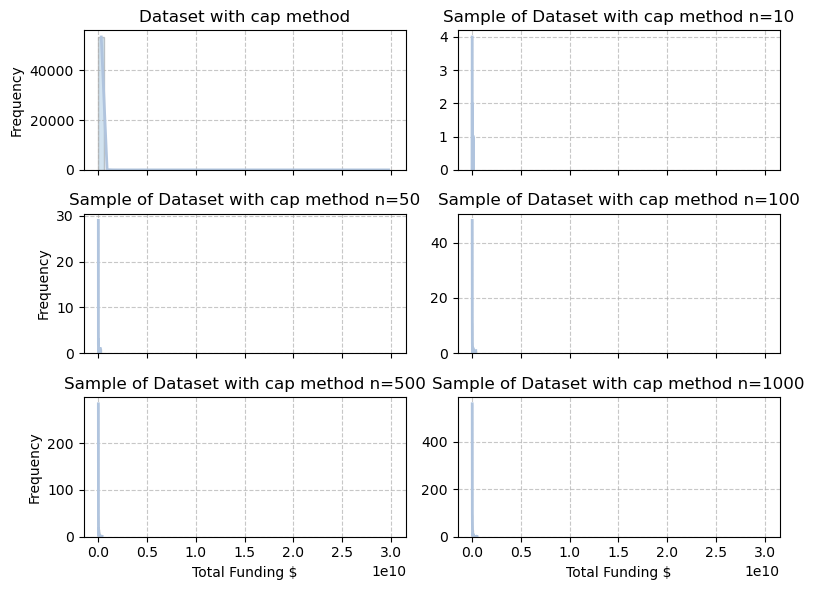

In [661]:
# Creating the Histogram chart for visualization

fig, ax = plt.subplots(3,2,sharex=True,figsize=(8, 6))

ax[0,0].hist(df["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Dataset with cap method")
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(df_us_10["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_us_10["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].set_title("Sample of Dataset with cap method n=10")

ax[1,0].hist(df_us_50["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_us_50["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Sample of Dataset with cap method n=50")
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(df_us_100["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_us_100["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[1,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Sample of Dataset with cap method n=100")

ax[2,0].hist(df_us_500["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_us_500["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[2,0].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[2,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[2,0].set_title("Sample of Dataset with cap method n=500")
ax[2,0].set_xlabel("Total Funding $")
ax[2,0].set_ylabel('Frequency')

ax[2,1].hist(df_us_1000["funding_total_usd"], bins=50, edgecolor='black',alpha=0.2)
hist, bin_edges = np.histogram(df_us_1000["funding_total_usd"].dropna(), bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[2,1].plot(bin_centers, hist, color='lightsteelblue', linewidth=2)
ax[2,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[2,1].set_title("Sample of Dataset with cap method n=1000")
ax[2,1].set_xlabel("Total Funding $")


plt.tight_layout()

# Show the plot
plt.show()  

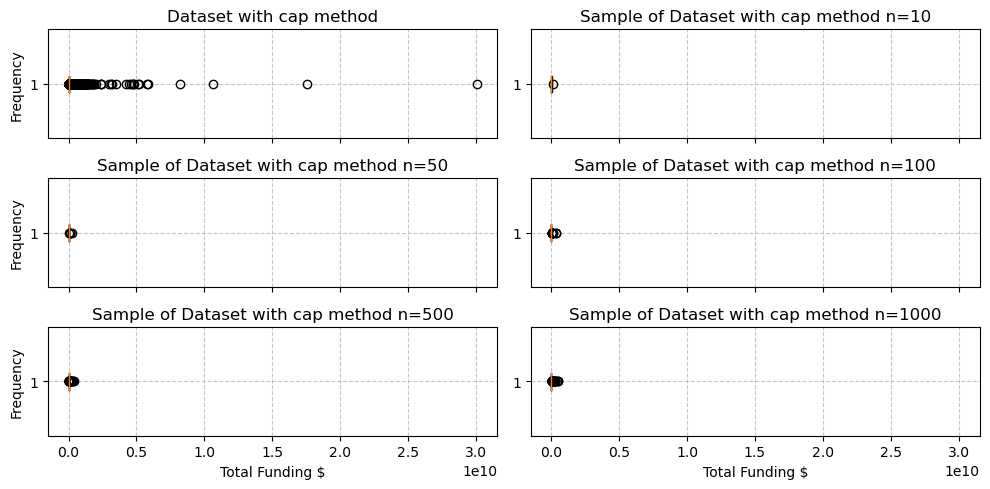

In [662]:
# Creating the BoxPlot chart for visualization

fig, ax = plt.subplots(3,2,sharex=True,figsize=(10, 5))

ax[0,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,0].set_title("Dataset with cap method")
ax[0,0].set_ylabel('Frequency')
ax[0,0].boxplot(df["funding_total_usd"].dropna(), vert=False)

ax[0,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[0,1].boxplot(df_us_10["funding_total_usd"].dropna(), vert=False)
ax[0,1].set_title("Sample of Dataset with cap method n=10")

ax[1,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,0].set_title("Sample of Dataset with cap method n=50")
ax[1,0].set_ylabel('Frequency')
ax[1,0].boxplot(df_us_50["funding_total_usd"].dropna(), vert=False)


ax[1,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[1,1].set_title("Sample of Dataset with cap method n=100")
ax[1,1].boxplot(df_us_100["funding_total_usd"].dropna(), vert=False)

ax[2,0].grid(axis='both', linestyle='--', alpha=0.7)
ax[2,0].set_title("Sample of Dataset with cap method n=500")
ax[2,0].set_ylabel('Frequency')
ax[2,0].set_xlabel("Total Funding $")
ax[2,0].boxplot(df_us_500["funding_total_usd"].dropna(), vert=False)


ax[2,1].grid(axis='both', linestyle='--', alpha=0.7)
ax[2,1].set_title("Sample of Dataset with cap method n=1000")
ax[2,1].set_xlabel("Total Funding $")
ax[2,1].boxplot(df_us_1000["funding_total_usd"].dropna(), vert=False)

plt.tight_layout()

plt.show()

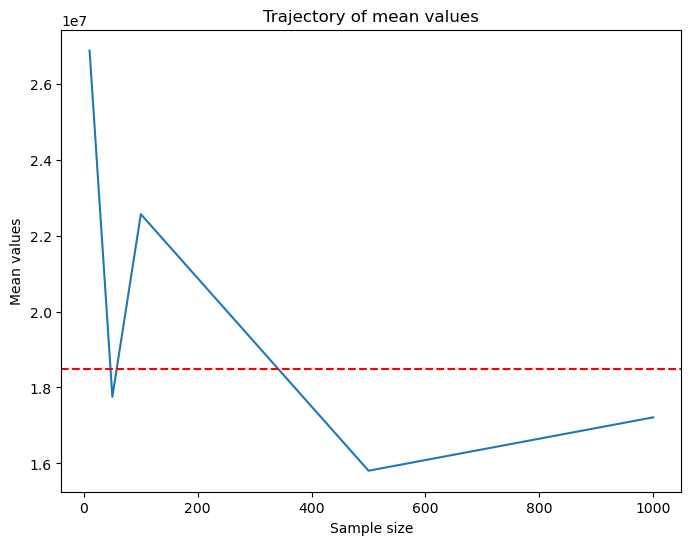

In [663]:
# Let's visualize the mean value of the samples approaching the mean value of the original dataset as the n size rises

sample_sizes = [10,50,100,500,1000]
means = [df_us_10["funding_total_usd"].mean(), df_us_50["funding_total_usd"].mean(),\
         df_us_100["funding_total_usd"].mean(), df_us_500["funding_total_usd"].mean(),\
         df_us_1000["funding_total_usd"].mean()]

temp_df = pd.DataFrame(sample_sizes,means)

line = df["funding_total_usd"].mean()

temp_df.reset_index(inplace=True)
temp_df.rename(columns={'index': 'Mean value'}, inplace=True)
temp_df.rename(columns={0: 'Sample size'}, inplace=True)
temp_df.set_index('Sample size', inplace=True)
temp_df

fig,ax = plt.subplots(figsize=(8,6))

ax.plot(temp_df)
ax.set_xlabel("Sample size")
ax.set_ylabel("Mean values")
ax.set_title("Trajectory of mean values")

plt.axhline(y=line, color='red', linestyle='--', label='Horizontal Line')

plt.show()



**Observations to question 5**

**Total Funding**

Original Dataset vs sample datasets

Sample of Original Dataset n=10:
Differences:
- The sample mean is higher than the original mean.
- The spread measures (range, interquartile range, variance, standard deviation) are much smaller in the sample.
- The quartiles and minimum/maximum values show significant differences.

Sample of Original Dataset n=50:
Differences:
- The sample mean is lower than the original mean.
- The spread measures are smaller in the sample compared to the original dataset.
- Quartiles and minimum/maximum values also exhibit differences.

Sample of Original Dataset n=100:
Differences:
- The sample mean is lower than the original mean.
- The spread measures are smaller in the sample.
- Quartiles and minimum/maximum values exhibit differences.

Sample of Original Dataset n=500:
Differences:
- The sample mean is lower than the original mean.
- The spread measures are smaller in the sample.
- Quartiles and minimum/maximum values show differences.

Sample of Original Dataset n=1000:
Differences:
- The sample mean is lower than the original mean.
- The spread measures are smaller in the sample.
- Quartiles and minimum/maximum values exhibit differences.

Summary:
- As the sample size increases, the sample statistics tend to converge towards the statistics of the original dataset.
- Smaller sample sizes may show more variability and differences in statistics compared to the original dataset.
- The differences observed are typical of random sampling variation, and larger sample sizes generally provide more reliable estimates of population parameters.
- The cap method applied to the dataset appears to influence the mean and spread measures in the sample datasets.

### 6. Subsetting, Sampling, Benchmarking and Visualisation:
Segment your dataset from Question 3 and this time draw a sample randomly of a sufficient size, say, 100 to get companies based in each of the United States, Canada, France, Germany, China, India and South Korea. 
Next, analyse the same dataset to find average number of days taken for a startup to be funded for each of the aforesaid countries and compare results (While making necessary computations, assume that there are 30 days in each month at an average).
Analyse the numerical variable(s) for each of the countries using various measures of central tendencies and spread and report your observations. Create appropriate plots (if necessary) to explain the variables.

**Observation:**
- I'm going to choose the **cap method** dataset because I believe is the one that can reduce the impact of outliers in our indicators but still keep most of its initial integrety

In [664]:
# Subseting our df cap method for companies based in the US, Canada, France, Germany, China, India and South Korea
df_subset = df_c_1.loc[df["country_code"].isin(["USA","CAN","FRA","DEU","CHN","IND","KOR"])]

In [665]:
# Let's sample for 1000 records so we can get less variability in our results
np.random.seed(13)
df_subset_sample = df_subset.sample(1000)

To find the average number of days taken to be funded, we simply get the difference from first_funding_at and founded_at

In [666]:
# to do, so we need to first drop the NaN values for the columns in question
df_subset_sample = df_subset_sample.dropna(subset = ["founded_at"])
df_subset_sample = df_subset_sample.dropna(subset =["first_funding_at"])

In [667]:
# let's create a new column with that difference: "days_to_funded"
df_subset_sample["days_to_funded"] = df_subset_sample["first_funding_at"] - \
                                      df_subset_sample["founded_at"]

In [668]:
# Makign the timedelta object to only express days as an integer.
df_subset_sample["days_to_funded"] = df_subset_sample["days_to_funded"].dt.days.astype(int)

In [669]:
grouped_df = df_subset_sample.groupby("country_code")["days_to_funded"].mean().sort_values()

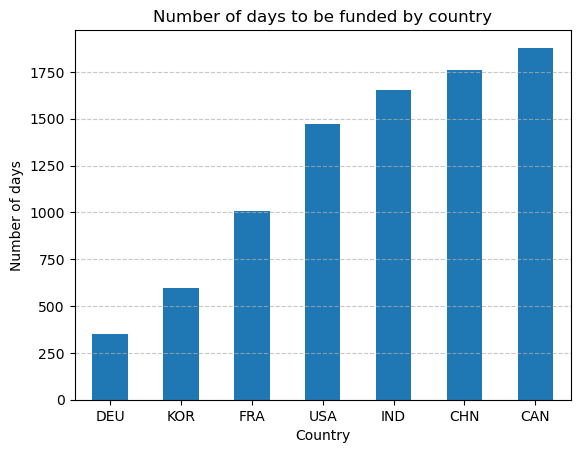

In [670]:
grouped_df.plot(kind='bar', rot=0)
plt.xlabel('Country')
plt.ylabel('Number of days')
plt.title('Number of days to be funded by country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**
- It seems that Germany has the fastest companies to be funded in our study.
They take, on average, approximately 300 days.
- On the other end of the spectrum we have Canada with almost 2000 days on average to be funded.

- Let's investigate the variable total funding between these countries

In [671]:
print_measuring_results("South Korea - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="KOR","funding_total_usd"])
print_measuring_results("Germany - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="DEU","funding_total_usd"])
print_measuring_results("France - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="FRA","funding_total_usd"])
print_measuring_results("Canada - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="CAN","funding_total_usd"])
print_measuring_results("US - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="USA","funding_total_usd"])
print_measuring_results("India - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="IND","funding_total_usd"])
print_measuring_results("China - Total Funding",df_subset_sample.loc[df_subset_sample["country_code"]=="CHN","funding_total_usd"])



------------- South Korea - Total Funding -------------

Measures of Central Tendency
Mean: 240,349.00
Median: 131,475.00
Mode: 36,519.00

Measures of Spread
Range: 627,850.00
Interquartile Range: 190,338.00
Variance: 64,375,770,056.50
Standard Deviation: 253,723.81

Measures of Location
1st Quartile: 89,522.00
3rd Quartile: 279,860.00
Min: 36,519.00
Max: 664,369.00

------------- Germany - Total Funding -------------

Measures of Central Tendency
Mean: 15,454,077.15
Median: 2,459,722.05
Mode: 357,125.00

Measures of Spread
Range: 89,642,875.00
Interquartile Range: 5,532,171.50
Variance: 1,087,501,521,568,801.00
Standard Deviation: 32,977,287.97

Measures of Location
1st Quartile: 1,074,337.50
3rd Quartile: 6,606,509.00
Min: 357,125.00
Max: 90,000,000.00

------------- France - Total Funding -------------

Measures of Central Tendency
Mean: 6,371,381.63
Median: 2,738,777.50
Mode: 130,636.00

Measures of Spread
Range: 32,253,336.00
Interquartile Range: 8,228,380.00
Variance: 69,624,140

In [672]:
grouped_funding = df_subset_sample.groupby("country_code")["funding_total_usd"].sum().sort_values()

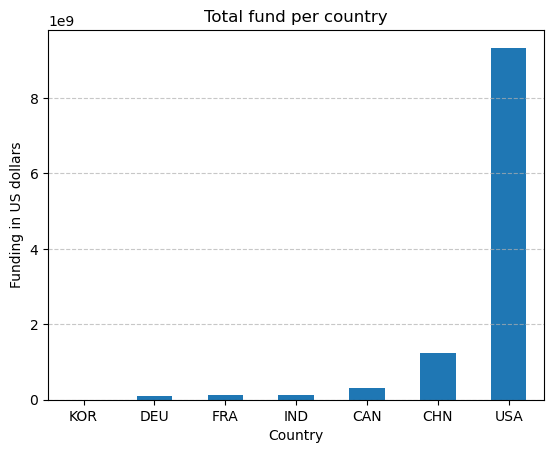

In [673]:
grouped_funding.plot(kind='bar', rot=0)
plt.xlabel('Country')
plt.ylabel('Funding in US dollars')
plt.title('Total fund per country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**
- We can clearly see that USA was the country where countries based had the most funding.

- Let's investigate the variable Number of funding rounds between these countries

In [674]:
print_measuring_results("South Korea - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="KOR","funding_rounds"])
print_measuring_results("Germany - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="DEU","funding_rounds"])
print_measuring_results("France - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="FRA","funding_rounds"])
print_measuring_results("Canada - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="CAN","funding_rounds"])
print_measuring_results("US - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="USA","funding_rounds"])
print_measuring_results("India - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="IND","funding_rounds"])
print_measuring_results("China - Number of Rounds",df_subset_sample.loc[df_subset_sample["country_code"]=="CHN","funding_rounds"])


------------- South Korea - Number of Rounds -------------

Measures of Central Tendency
Mean: 1.12
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 1.00
Interquartile Range: 0.00
Variance: 0.12
Standard Deviation: 0.35

Measures of Location
1st Quartile: 1.00
3rd Quartile: 1.00
Min: 1.00
Max: 2.00

------------- Germany - Number of Rounds -------------

Measures of Central Tendency
Mean: 1.46
Median: 1.00
Mode: 1.00

Measures of Spread
Range: 4.00
Interquartile Range: 0.00
Variance: 1.27
Standard Deviation: 1.13

Measures of Location
1st Quartile: 1.00
3rd Quartile: 1.00
Min: 1.00
Max: 5.00

------------- France - Number of Rounds -------------

Measures of Central Tendency
Mean: 2.05
Median: 2.00
Mode: 1.00

Measures of Spread
Range: 4.00
Interquartile Range: 2.00
Variance: 1.52
Standard Deviation: 1.23

Measures of Location
1st Quartile: 1.00
3rd Quartile: 3.00
Min: 1.00
Max: 5.00

------------- Canada - Number of Rounds -------------

Measures of Central Tendency
Mean: 1.49
Medi

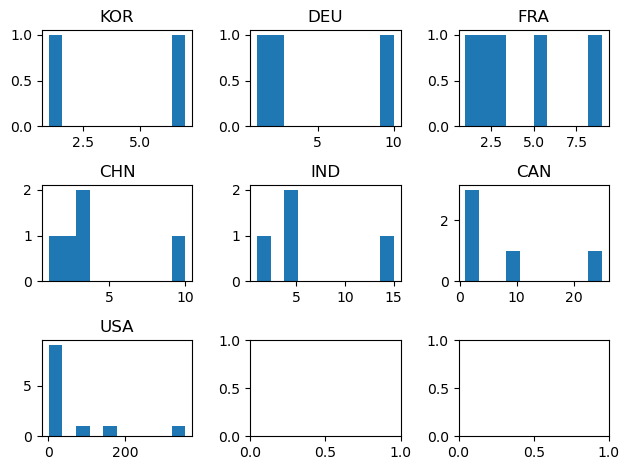

In [675]:
fig,ax= plt.subplots(3,3,sharex=False)

df45 = df_subset_sample[df_subset_sample["country_code"]=="KOR"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df46 = df_subset_sample[df_subset_sample["country_code"]=="DEU"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df47 = df_subset_sample[df_subset_sample["country_code"]=="FRA"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df48 = df_subset_sample[df_subset_sample["country_code"]=="CHN"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df49 = df_subset_sample[df_subset_sample["country_code"]=="IND"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df50 = df_subset_sample[df_subset_sample["country_code"]=="CAN"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()
df51 = df_subset_sample[df_subset_sample["country_code"]=="USA"].groupby("funding_rounds", as_index=False)["funding_rounds"].count()


ax[0,0].set_title("KOR")
ax[0,1].set_title("DEU")
ax[0,2].set_title("FRA")
ax[1,0].set_title("CHN")
ax[1,1].set_title("IND")
ax[1,2].set_title("CAN")
ax[2,0].set_title("USA")

ax[0,0].hist(df45)
ax[0,1].hist(df46)
ax[0,2].hist(df47)
ax[1,0].hist(df48)
ax[1,1].hist(df49)
ax[1,2].hist(df50)
ax[2,0].hist(df51)

plt.tight_layout()


plt.show()

**Observation:**

- We can state that regarding the number of funding rounds, USA is the only country in our sample with startups more than 4 rounds.
 - The mode in every country is 1.
 - USA is the country with the highest standard deviation

### 7. Probability Theory:
Find the probability for startups of being funded within the first 6 months since their creation for the overall dataset and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (While making necessary computations, assume that there are 30 days in each month at an average). Report your results in writing and compare them varying across various geographies. Create appropriate plots (if necessary) to draw conclusions if necessary.

In [676]:
# Like the last time, we need to drop the nan values to build a column of days until funding
df = df.dropna(subset = ["founded_at"])
df = df.dropna(subset =["first_funding_at"])

# let's create a new column with that difference: "days_to_funded"
df["days_to_funded"] = df["first_funding_at"] - \
                                      df["founded_at"]

# Makign the timedelta object to only express days as an integer.
df["days_to_funded"] = df["days_to_funded"].dt.days.astype(int)

In [677]:
# creating the mask: 30 days * 6
six_months = 180

# let's define days_to_funded <= six_months as favorable_outcome

- for the whole dataset

In [678]:
# Calculating the probability for the whole dataset
    
nr_successes = len(df.loc[df["days_to_funded"]<=six_months])
event_space = len(df)
probability_for_wholedataset = nr_successes/event_space

1. United States

In [679]:
df_us = df.loc[df["country_code"]=="USA"]
nr_successes = len(df_us.loc[df_us["days_to_funded"]<=six_months])
event_space = len(df_us)
probability_for_US = nr_successes/event_space

2. Canada

In [680]:
df_can = df.loc[df["country_code"]=="CAN"]
nr_successes = len(df_can.loc[df_can["days_to_funded"]<=six_months])
event_space = len(df_can)
probability_for_Canada = nr_successes/event_space

3. France

In [681]:
df_fra = df.loc[df["country_code"]=="FRA"]
nr_successes = len(df_fra.loc[df_fra["days_to_funded"]<=six_months])
event_space = len(df.loc[(df["country_code"]=="FRA")])
probability_for_France = nr_successes/event_space

4. Germany

In [682]:
df_deu = df.loc[df["country_code"]=="DEU"]
nr_successes = len(df_deu.loc[df_deu["days_to_funded"]<=six_months])
event_space = len(df_deu)
probability_for_Germany = nr_successes/event_space

5. for China

In [683]:
df_chn = df.loc[df["country_code"]=="CHN"]
nr_successes = len(df_chn.loc[df_chn["days_to_funded"]<=six_months])
event_space = len(df_chn)
probability_for_China = nr_successes/event_space

6. for India

In [684]:
df_ind = df.loc[df["country_code"]=="IND"]
nr_successes = len(df_ind.loc[df_ind["days_to_funded"]<=six_months])
event_space = len(df_ind)
probability_for_India = nr_successes/event_space

In [685]:
# Printing our results
print("\033[1mThe probability of a startup being funded within 6 months in:\033[0m\n")
print("Whole dataset: ",probability_for_wholedataset)
print("United States: ",probability_for_US)
print("Canada: ",probability_for_Canada)
print("France: ",probability_for_France)
print("Germany: ",probability_for_Germany)
print("China: ",probability_for_China)
print("India: ",probability_for_India)

The probability of a startup being funded within 6 months in:

Whole dataset:  0.2778364632237872
United States:  0.2493788413757029
Canada:  0.24412532637075718
France:  0.22
Germany:  0.3128834355828221
China:  0.18615751789976134
India:  0.21505376344086022


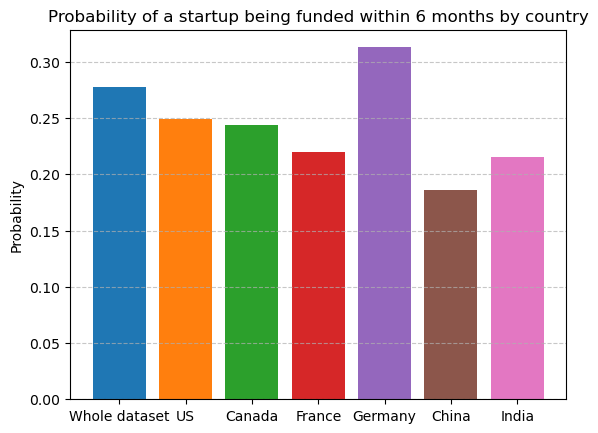

In [686]:
plt.title("Probability of a startup being funded within 6 months by country")
plt.ylabel("Probability")

plt.bar("Whole dataset",probability_for_wholedataset)
plt.bar("US",probability_for_US)
plt.bar("Canada",probability_for_Canada)
plt.bar("France",probability_for_France)
plt.bar("Germany",probability_for_Germany)
plt.bar("China",probability_for_China)
plt.bar("India",probability_for_India)

plt.grid(axis='y', linestyle='--', alpha=0.7)

**Observations to question 7**

- All of the selected countries, except Germany, have a lower probability of having a startup funded within 6 months than the whole dataset. This means that, other countries that were not selected are pulling upwards the probability for the whole set.
- In addition, not every country has the same number of companies present in the dataset, meaning each country has a different weight.
- Let's impute 1 more country in our selected countries to check its influence

In [687]:
df.groupby("country_code")["first_funding_at"].count().sort_values(ascending=False).head(5)

country_code
USA    30588
GBR     2810
CAN     1532
IND     1302
FRA      900
Name: first_funding_at, dtype: int64

In [688]:
nr_successes = len(df.loc[(df["country_code"]=="GBR") & (df["days_to_funded"]<=six_months)])
event_space = len(df.loc[(df["country_code"]=="GBR")])
probability_for_GBR = nr_successes/event_space

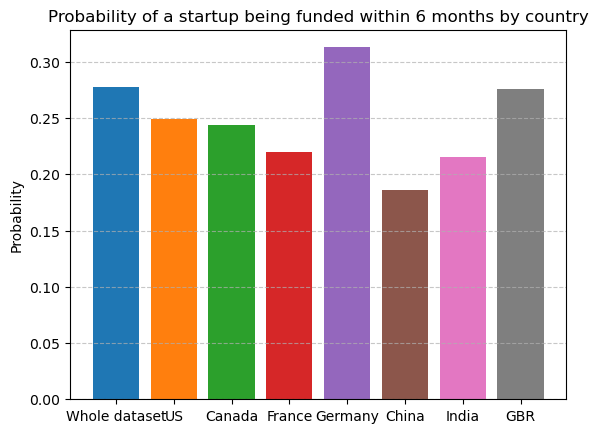

In [689]:
plt.title("Probability of a startup being funded within 6 months by country")
plt.ylabel("Probability")

plt.bar("Whole dataset",probability_for_wholedataset)
plt.bar("US",probability_for_US)
plt.bar("Canada",probability_for_Canada)
plt.bar("France",probability_for_France)
plt.bar("Germany",probability_for_Germany)
plt.bar("China",probability_for_China)
plt.bar("India",probability_for_India)
plt.bar("GBR",probability_for_GBR)


plt.grid(axis='y', linestyle='--', alpha=0.7)

**Observation:**
- Here you can see that GBR has a very a higher probability than most of the countries, which makes the whole dataset probability to go upwards.

### 8. Advanced Probability Theory:
Find the probability for startups of being funded within the first 6 months given the fact that they are based on software domain and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India(Use the value ‘Software’ in the appropriate variable of your choice).

So for this exercise, we want to calculate the probability of the event early funding (within 6 months) given the event that it's a startup from the software domain.

To calculate it, we use the formula below, being
- A = "early funding (within 6 months)"
- B = "startup from the software domain"

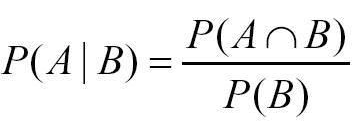

In [712]:
# Cleanign the NaN i. the category list to be able to subseting properly
df = df.dropna(subset=["category_list"])

In [713]:
def getdf_cond_prob_8(country_code = "all",Domain="Software"):
    
    
    # What region are we evaluating based on the country_code?
    if country_code == "USA":
        df1 = df_us
    elif country_code == "CAN":
        df1 = df_can
    elif country_code == "FRA":
        df1 = df_fra
    elif country_code == "DEU":
        df1 = df_deu
    elif country_code == "CHN":
        df1 = df_chn
    elif country_code == "IND":
        df1 = df_ind
    else:
        df1 = df
        
    #NUMERATOR: let's get the probability of the numerator P(AnB)
    # Setting first our df for early funding and being a software domain
    subset_df = df1.loc[ (df1["days_to_funded"]<=six_months) & (df1['category_list'].str.contains(Domain))]
    
    # Calculating the probability of the intersection
    nr_successes = len(subset_df)
    event_space = len(df1)
    probability_for_numerator = nr_successes/event_space
    
    #DENOMINATOR: let's get the probability of the denominator P(B)
    nr_successes = len(df1['category_list'].str.contains(Domain))
    event_space = len(df1)
    probability_for_denominator = nr_successes/event_space
    
    #RESULT
    probability = probability_for_numerator/probability_for_denominator
    
    return probability

In [714]:
conditional_prob_whole_data_set_8 = getdf_cond_prob_8()

**8.B** Now, we will do the same calculation for each country selected
1. United States

In [715]:
conditional_prob_US_data_set_8 = getdf_cond_prob_8("USA")

2. Canada

In [716]:
conditional_prob_CAN_data_set_8 = getdf_cond_prob_8("CAN")

3. France

In [717]:
conditional_prob_FRA_data_set_8 = getdf_cond_prob_8("FRA")

4. Germany

In [718]:
conditional_prob_DEU_data_set_8 = getdf_cond_prob_8("DEU")

5. China

In [719]:
conditional_prob_CHN_data_set_8 = getdf_cond_prob_8("CHN")

6. India

In [720]:
conditional_prob_IND_data_set_8 = getdf_cond_prob_8("IND")

**Comparisons**

In [721]:
# Printing our results

data = {'Region': ["Whole dataset","United States","Canada", "France","Germany","China","India"],\
        'Prob': [conditional_prob_whole_data_set_8,conditional_prob_US_data_set_8,conditional_prob_CAN_data_set_8,\
                  conditional_prob_FRA_data_set_8,conditional_prob_DEU_data_set_8,conditional_prob_CHN_data_set_8,\
                  conditional_prob_IND_data_set_8]\
       }

sort_df = pd.DataFrame(data)

sort_df = sort_df.sort_values("Prob",ascending=False)


print("\033[1mThe probability of a startup being funded within 6 months given that it is from the Software domain in:\033[0m\n")
print("\nThe prob are in a descending order")
sort_df


The probability of a startup being funded within 6 months given that it is from the Software domain in:


The prob are in a descending order


,Region,Prob
2,Canada,0.055483
0,Whole dataset,0.051584
4,Germany,0.051534
1,United States,0.049039
3,France,0.045556
6,India,0.029954
5,China,0.014320


**Observations:**

- Canada: This region has the highest probability among the individual countries, suggesting that events or instances from Canada are more likely compared to other individual countries.

- Whole Dataset: This entry likely represents the overall probability for the entire dataset, including all regions. It has a probability between Canada and the Germany, suggesting that events from the entire dataset are moderately likely.

- United States: While the United States has a slightly lower probability than Canada and the entire dataset, it still has a significant likelihood of occurrence.

- China: China has the lowest probability among the listed regions, suggesting that events or instances from China are the least likely.

### 9. Advanced Probability Theory:
Find the probability that a startup belongs to health care domain given the fact that it was funded within the first 6 months and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (Use the value ‘Health Care’ in the appropriate variable of your choice). Report your results based on probability found as a whole and then comparison across various countries.

So for this exercise, we want to calculate the probability of the event early funding (within 6 months) given the event that it's a startup from the software domain.

To calculate it, we use the formula below, being
- A = "early funding (within 6 months)"
- B = "startup from the Health Care domain"

In [722]:
conditional_prob_whole_data_set_9 = getdf_cond_prob_8(Domain="Health")

**8.B** Now, we will do the same calculation for each country selected
1. United States

In [723]:
conditional_prob_US_data_set_9  = getdf_cond_prob_8("USA",Domain="Health")

2. Canada

In [724]:
conditional_prob_CAN_data_set_9  = getdf_cond_prob_8("CAN",Domain="Health")

3. France

In [725]:
conditional_prob_FRA_data_set_9  = getdf_cond_prob_8("FRA",Domain="Health")

4. Germany

In [726]:
conditional_prob_DEU_data_set_9  = getdf_cond_prob_8("DEU",Domain="Health")

5. China

In [727]:
conditional_prob_CHN_data_set_9  = getdf_cond_prob_8("CHN",Domain="Health")

6. India

In [728]:
conditional_prob_IND_data_set_9  = getdf_cond_prob_8("IND",Domain="Health")

**Comparisons**

In [730]:
# Printing our results

data = {'Region': ["Whole dataset","United States","Canada", "France","Germany","China","India"],\
        'Prob': [conditional_prob_whole_data_set_9 ,conditional_prob_US_data_set_9 ,conditional_prob_CAN_data_set_9 ,\
                  conditional_prob_FRA_data_set_9,conditional_prob_DEU_data_set_9 ,conditional_prob_CHN_data_set_9 ,\
                  conditional_prob_IND_data_set_9 ]\
       }


sort_df = pd.DataFrame(data)

sort_df = sort_df.sort_values("Prob",ascending=False)


print("\033[1mThe probability of a startup being funded within 6 months given that it is from the Health Care domain in:\033[0m\n")
print("\nThe prob are in a descending order")
sort_df


The probability of a startup being funded within 6 months given that it is from the Health Care domain in:


The prob are in a descending order


,Region,Prob
4,Germany,0.015951
1,United States,0.013404
0,Whole dataset,0.013143
2,Canada,0.009138
3,France,0.007778
6,India,0.006144
5,China,0.005967


**Observations:**

- Germany: This region has the highest probability among the individual countries, suggesting that events or instances from Germany are more likely compared to other individual countries.

- United States: While the United States has a slightly lower probability than Germany, it still has a significant likelihood of occurrence.

- Whole Dataset: This entry likely represents the overall probability for the entire dataset, including all regions. It has a probability between Germany and the United States, suggesting that events from the entire dataset are moderately likely.

- China: China has the lowest probability among the listed regions, suggesting that events or instances from China are the least likely.

### 10. Advanced Probability Theory:
Repeat the analysis in Question 8 but this time perform the operation by first sampling your dataset randomly by getting only 10 data points in the beginning and report your observations as that in Question 8. Next, attempt to repeat the aforesaid procedure for dataset of increasing sample size of 50, 100, 200, 300, 400, 500, 600, and 800. Plot the various probabilities observed against the number of data points you have obtained and write in your own words the observations. 

So for this exercise, we want to calculate the probability of the event early funding (within 6 months) given the event that it's a startup from the software domain.

To calculate it, we use the formula below, being

- A = "early funding (within 6 months)"
- B = "startup from the software domain"

In [731]:
def getdf_cond_prob_10(country_code = "all"):
    
    
    # What region are we evaluating based on the country_code?
    if country_code == "USA":
        df1 = df_us
    elif country_code == "CAN":
        df1 = df_can
    elif country_code == "FRA":
        df1 = df_fra
    elif country_code == "DEU":
        df1 = df_deu
    elif country_code == "CHN":
        df1 = df_chn
    elif country_code == "IND":
        df1 = df_ind
    else:
        df1 = df
        
    #SAMPLES
    samples = [10,50,100, 200, 300, 400, 500, 600, 800]    
    
    #PROBABILITY - empty list for for loop
    probabilities = []
    
    #DRAW SAMPLE
    np.random.seed(100)
    
    for size in samples:
        df_sample = df1.sample(size)
    
        #NUMERATOR: let's get the probability of the numerator P(AnB)
        # Setting first our df for early funding and being a software domain
        subset_df = df_sample.loc[ (df_sample["days_to_funded"]<=six_months) & (df_sample['category_list'].str.contains('Software'))]

        # Calculating the probability of the intersection
        nr_successes = len(subset_df)
        event_space = len(df_sample)
        probability_for_numerator = nr_successes/event_space

        #DENOMINATOR: let's get the probability of the denominator P(B)
        nr_successes = len(df_sample['category_list'].str.contains('Software'))
        event_space = len(df_sample)
        probability_for_denominator = nr_successes/event_space

        #RESULT - adding to the list of probabilities
        probabilities.append(probability_for_numerator/probability_for_denominator)
    
    
    # Creating a df for the country selected with the probabilities for each sample size
    
    final_df = pd.DataFrame(list(zip(samples, probabilities)),columns =['Sample Size', 'Probability'])
    final_df.set_index("Sample Size",inplace = True)
        
        
    return final_df

In [735]:
# This is the mean of days_to_funded for the original dataset
population_prob = conditional_prob_whole_data_set_8

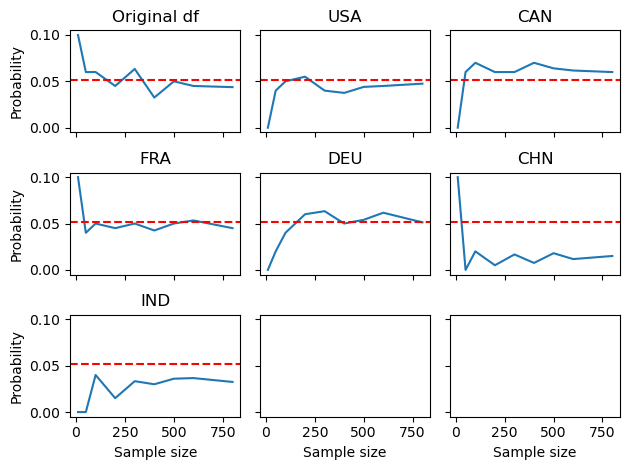

In [736]:
#Ploting the probabilities based on sample size

fig, ax = plt.subplots(3,3,sharex=True,sharey=True)


ax[0,0].plot(getdf_cond_prob_10(country_code = "all"))
ax[0,0].set_title("Original df")
ax[0,0].set_ylabel("Probability")
ax[0,0].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[0,1].plot(getdf_cond_prob_10(country_code = "USA"))
ax[0,1].set_title("USA")
ax[0,1].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')

ax[0,2].plot(getdf_cond_prob_10(country_code = "CAN"))
ax[0,2].set_title("CAN")
ax[0,2].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[1,0].plot(getdf_cond_prob_10(country_code = "FRA"))
ax[1,0].set_title("FRA")
ax[1,0].set_ylabel("Probability")
ax[1,0].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[1,1].plot(getdf_cond_prob_10(country_code = "DEU"))
ax[1,1].set_title("DEU")
ax[1,1].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[1,2].plot(getdf_cond_prob_10(country_code = "CHN"))
ax[1,2].set_title("CHN")
ax[1,2].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[2,0].plot(getdf_cond_prob_10(country_code = "IND"))
ax[2,0].set_title("IND")
ax[2,0].set_xlabel("Sample size")
ax[2,0].set_ylabel("Probability")
ax[2,0].axhline(y=population_prob, color='red', linestyle='--', label='Horizontal Line')


ax[2,1].set_xlabel("Sample size")
ax[2,2].set_xlabel("Sample size")


plt.tight_layout()

plt.show()


**Observations:**

The probability in question is a conditional probability of selecting a startup with early funding (within 6 months) given the fact that they are based on software domain.

We computed this probability for samples of the whole set and for samples of the selected regions.

- The probabilities computed range from 0-10%.
- The probability of the original df ≈ 5% and it was marked with a red color to study convergency as we increase sample size.
- As a general trait of the regions, as we increase the sample size, the probability values get closer and closer to the probability of the original df ≈ 5%

- Nonethless, the graphs show us that China is still far from the probability of the original df.